#### Pizza Delivery Analysis

This repository presents an Exploratory Data Analysis (EDA) of a pizza delivery dataset. The dataset contains comprehensive information on individual pizza orders, including delivery times, distances, payment methods, pizza characteristics, and external factors like traffic and peak hours.

The workflow of this notebook includes:

1. Data import and exploration
2. Data cleaning and preparation
3. Exploratory Data Analysis (EDA)
4. Preparation for visualization and reporting (e.g., Tableau)

> Tools used: Python (Pandas, NumPy, Matplotlib/Seaborn), Tableau

In [48]:
# STEP 1: Data Import and Initial Exploration
# -------------------------------------------
# This script imports inspection data from a CSV file and performs basic
# exploration to understand the structure and quality of the dataset.

import pandas as pd

# Load the dataset
file_path = "Enhanced_pizza_sales.csv"
df = pd.read_csv(file_path, sep=';')

# Display basic info
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types and non-null values:\n")
print(df.info())

# Display column names in a vertical list
print("Column names:\n")
print(pd.Series(df.columns))

# Show sample rows
print("\nSample rows:\n")
print(df.head())

# Describe numerical and categorical data
print("\nStatistical summary:\n")
print(df.describe(include='all'))



Shape of the dataset: (1004, 26)

Column names:
 ['Order ID', 'Restaurant Name', 'Location', 'Order Time', 'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type', 'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method', 'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)', 'Topping Density', 'Order Month', 'Payment Category', 'Estimated Duration (min)', 'Delay (min)', 'Is Delayed', 'Pizza Complexity', 'Traffic Impact', 'Order Hour', 'Restaurant Avg Time', 'Price ($)']

Data types and non-null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Order ID                      1004 non-null   object
 1   Restaurant Name               1004 non-null   object
 2   Location                      1004 non-null   object
 3   Order Time                    1004 non-null   object
 

In [49]:
df.shape

(1004, 26)

In [50]:
df.head(5)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Price ($)
0,ORD011,Domino's,"San Francisco, CA",11/01/2024 17:30,11/01/2024 17:50,20,Large,Veg,4,4,...,January,Online,"9,6","10,4",FALSO,12,1,17,"30,25943396","13,7"
1,ORD586,Domino's,"San Francisco, CA",22/05/2025 20:15,22/05/2025 21:00,45,Large,Veg,4,9,...,May,Offline,"21,6","23,4",VERDADERO,12,3,20,"30,25943396","13,7"
2,ORD616,Domino's,"San Francisco, CA",21/06/2025 20:15,21/06/2025 21:00,45,Large,Veg,4,9,...,June,Offline,"21,6","23,4",VERDADERO,12,3,20,"30,25943396","13,7"
3,ORD204,Pizza Hut,"Houston, TX",19/07/2024 19:45,19/07/2024 20:10,25,XL,Cheese Burst,5,6,...,July,Online,"14,4","10,6",FALSO,20,3,19,"29,94845361","17,5"
4,ORD224,Pizza Hut,"Houston, TX",08/08/2024 19:45,08/08/2024 20:10,25,XL,Cheese Burst,5,6,...,August,Online,"14,4","10,6",FALSO,20,3,19,"29,94845361","17,5"


In [51]:
df.describe()

,Delivery Duration (min),Toppings Count,Pizza Complexity,Traffic Impact,Order Hour
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,29.492032,3.362550,9.468127,2.049801,18.691235
std,7.753103,1.135853,6.233731,0.775696,1.529466
min,15.000000,1.000000,1.000000,1.000000,12.000000
25%,25.000000,3.000000,6.000000,1.000000,18.000000
50%,30.000000,3.000000,6.000000,2.000000,19.000000
75%,30.000000,4.000000,12.000000,3.000000,20.000000
max,50.000000,5.000000,20.000000,3.000000,21.000000


In [52]:
# STEP 2: Check missing values
# -------------------------------------------

print("\nMissing values per column:\n")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:

Order ID                        0
Restaurant Name                 0
Location                        0
Order Time                      0
Delivery Time                   0
Delivery Duration (min)         0
Pizza Size                      0
Pizza Type                      0
Toppings Count                  0
Distance (km)                   0
Traffic Level                   0
Payment Method                  0
Is Peak Hour                    0
Is Weekend                      0
Delivery Efficiency (min/km)    0
Topping Density                 0
Order Month                     0
Payment Category                0
Estimated Duration (min)        0
Delay (min)                     0
Is Delayed                      0
Pizza Complexity                0
Traffic Impact                  0
Order Hour                      0
Restaurant Avg Time             0
Price ($)                       0
dtype: int64


In [53]:

# STEP 3: Check for duplicate rows
# -------------------------------------------
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


### Inspect Key Variables
Objective: Explore key variables individually to better understand their values, data quality, and possible cleaning needs.

In [54]:
# STEP 4 - Inspect Key Variables
# First 10 Rows of the Location

print(df["Location"].head(10))


0    San Francisco, CA
1    San Francisco, CA
2    San Francisco, CA
3          Houston, TX
4          Houston, TX
5        Las Vegas, NV
6      Bakersfield, CA
7            Miami, FL
8            Miami, FL
9            Miami, FL
Name: Location, dtype: object


In [55]:
# Inspect the "Topping Density" column: pulp temperature in °C

print("\nRandom 10 values from 'Topping Density' column:\n")
print(df["Topping Density"].sample(10, random_state=1))


Random 10 values from 'Topping Density' column:

954            0,4
613            0,4
597    0,727272727
372            0,5
754            0,6
986    0,571428571
974            0,4
772            0,6
825              1
49             0,4
Name: Topping Density, dtype: object


In [56]:
# Inspect the "Pizza Complexity" column: pulp temperature in °C

print("\nRandom 10 values from 'Pizza Complexity' column:\n")
print(df["Pizza Complexity"].sample(10, random_state=1))


Random 10 values from 'Pizza Complexity' column:

954     1
613     1
597    12
372     4
754     6
986     4
974    12
772     6
825    20
49     12
Name: Pizza Complexity, dtype: int64


##### STEP 5: Missing Values Treatment
##### --------------------------------
##### There are no missing values

In [57]:
print(df.isnull().sum().sort_values(ascending=False))

Order ID                        0
Restaurant Name                 0
Location                        0
Order Time                      0
Delivery Time                   0
Delivery Duration (min)         0
Pizza Size                      0
Pizza Type                      0
Toppings Count                  0
Distance (km)                   0
Traffic Level                   0
Payment Method                  0
Is Peak Hour                    0
Is Weekend                      0
Delivery Efficiency (min/km)    0
Topping Density                 0
Order Month                     0
Payment Category                0
Estimated Duration (min)        0
Delay (min)                     0
Is Delayed                      0
Pizza Complexity                0
Traffic Impact                  0
Order Hour                      0
Restaurant Avg Time             0
Price ($)                       0
dtype: int64


##### STEP 6: Create the City and State columns
##### --------------------------------
##### Taken from the Location column

In [58]:
# Split the 'Location' column into 'City' and 'State'
df[['City', 'State']] = df['Location'].str.split(', ', expand=True)

# Save the result to a new file
df.to_csv("Enhanced_pizza_sales_with_city_state.csv", sep=';', index=False)

# # Check the first rows
print(df[['Location', 'City', 'State']].head())


            Location           City State
0  San Francisco, CA  San Francisco    CA
1  San Francisco, CA  San Francisco    CA
2  San Francisco, CA  San Francisco    CA
3        Houston, TX        Houston    TX
4        Houston, TX        Houston    TX


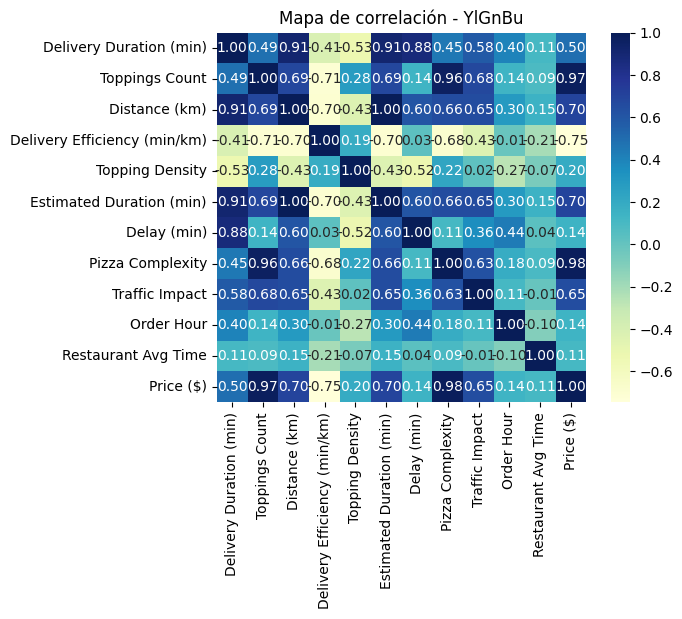

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Upload CSV separated by semicolon
df = pd.read_csv("Enhanced_pizza_sales.csv", sep=';')

# Convert columns with decimal point to real numbers
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
        except ValueError:
            continue

# Calculate correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title('Mapa de correlación - YlGnBu')
plt.show()


